<a href="https://colab.research.google.com/github/jmcconne100/Pandas_Notebook_Project/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# hypothesis_tests.py
import numpy as np
import pandas as pd
from scipy import stats


def one_sample_mean_test(sample, mu_0, alpha=0.05, alternative="two-sided"):
    """
    One-sample t-test comparing sample mean to a hypothesized population mean.

    Parameters
    ----------
    sample : array-like
        Sample data.
    mu_0 : float
        Hypothesized population mean.
    alpha : float
        Significance level (default 0.05).
    alternative : {"two-sided", "greater", "less"}
        Type of test.

    Returns
    -------
    dict with test statistic, p-value, decision, and summary.
    """
    t_stat, p_value = stats.ttest_1samp(sample, popmean=mu_0)
    if alternative == "greater":
        p_value /= 2
        reject = (t_stat > 0) and (p_value < alpha)
    elif alternative == "less":
        p_value /= 2
        reject = (t_stat < 0) and (p_value < alpha)
    else:
        reject = p_value < alpha

    return {
        "test": "One-sample t-test",
        "sample_mean": np.mean(sample),
        "hypothesized_mean": mu_0,
        "t_statistic": round(t_stat, 4),
        "p_value": round(p_value, 5),
        "reject_H0": reject,
    }


def two_sample_mean_test(sample1, sample2, equal_var=True, alpha=0.05):
    """
    Two-sample (independent) t-test comparing means of two samples.

    Parameters
    ----------
    sample1, sample2 : array-like
        Two samples.
    equal_var : bool
        Assume equal variances (default True).
    alpha : float
        Significance level.

    Returns
    -------
    dict summary
    """
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=equal_var)
    reject = p_value < alpha
    return {
        "test": "Two-sample t-test",
        "mean_1": np.mean(sample1),
        "mean_2": np.mean(sample2),
        "t_statistic": round(t_stat, 4),
        "p_value": round(p_value, 5),
        "reject_H0": reject,
    }


def paired_mean_test(before, after, alpha=0.05):
    """
    Paired t-test comparing means of matched pairs (before vs after).

    Returns
    -------
    dict summary
    """
    t_stat, p_value = stats.ttest_rel(before, after)
    reject = p_value < alpha
    return {
        "test": "Paired t-test",
        "mean_before": np.mean(before),
        "mean_after": np.mean(after),
        "t_statistic": round(t_stat, 4),
        "p_value": round(p_value, 5),
        "reject_H0": reject,
    }


def chi_square_independence_test(df, col1, col2, alpha=0.05):
    """
    Chi-square test of independence between two categorical variables.

    Returns
    -------
    dict summary
    """
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    reject = p < alpha
    return {
        "test": "Chi-square test of independence",
        "degrees_freedom": dof,
        "chi2_statistic": round(chi2, 4),
        "p_value": round(p, 5),
        "reject_H0": reject,
        "contingency_table": contingency,
    }


def one_sample_proportion_test(successes, n, p_0, alpha=0.05):
    """
    One-sample proportion z-test.

    Returns
    -------
    dict summary
    """
    phat = successes / n
    se = np.sqrt(p_0 * (1 - p_0) / n)
    z = (phat - p_0) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    reject = p_value < alpha
    return {
        "test": "One-sample proportion z-test",
        "phat": round(phat, 4),
        "p_0": p_0,
        "z_statistic": round(z, 4),
        "p_value": round(p_value, 5),
        "reject_H0": reject,
    }


def normality_test(sample, alpha=0.05):
    """
    Shapiro–Wilk test for normality.
    """
    stat, p_value = stats.shapiro(sample)
    reject = p_value < alpha
    return {
        "test": "Shapiro–Wilk normality test",
        "statistic": round(stat, 4),
        "p_value": round(p_value, 5),
        "reject_H0 (data NOT normal)": reject,
    }


In [2]:
import numpy as np
import pandas as pd

np.random.seed(42)

# --- Example 1: One-sample mean test ---
sample = np.random.normal(100, 10, 50)
print(one_sample_mean_test(sample, mu_0=105))

# --- Example 2: Two-sample mean test ---
group_a = np.random.normal(50, 5, 40)
group_b = np.random.normal(52, 5, 40)
print(two_sample_mean_test(group_a, group_b))

# --- Example 3: Paired mean test (before vs after) ---
before = np.random.normal(70, 8, 30)
after = before + np.random.normal(2, 3, 30)
print(paired_mean_test(before, after))

# --- Example 4: Chi-square test ---
df = pd.DataFrame({
    "gender": np.random.choice(["M", "F"], 100),
    "preference": np.random.choice(["A", "B", "C"], 100),
})
chi_result = chi_square_independence_test(df, "gender", "preference")
print({k: v for k, v in chi_result.items() if k != "contingency_table"})  # omit table for brevity

# --- Example 5: Proportion test ---
print(one_sample_proportion_test(successes=45, n=100, p_0=0.5))

# --- Example 6: Normality test ---
print(normality_test(sample))

{'test': 'One-sample t-test', 'sample_mean': np.float64(97.7452609474386), 'hypothesized_mean': 105, 't_statistic': np.float64(-5.4943), 'p_value': np.float64(0.0), 'reject_H0': np.True_}
{'test': 'Two-sample t-test', 'mean_1': np.float64(50.29761968159304), 'mean_2': np.float64(52.01146166494807), 't_statistic': np.float64(-1.6259), 'p_value': np.float64(0.10801), 'reject_H0': np.False_}
{'test': 'Paired t-test', 'mean_before': np.float64(69.46260348047548), 'mean_after': np.float64(71.91662800054182), 't_statistic': np.float64(-4.6325), 'p_value': np.float64(7e-05), 'reject_H0': np.True_}
{'test': 'Chi-square test of independence', 'degrees_freedom': 2, 'chi2_statistic': np.float64(0.3153), 'p_value': np.float64(0.85417), 'reject_H0': np.False_}
{'test': 'One-sample proportion z-test', 'phat': 0.45, 'p_0': 0.5, 'z_statistic': np.float64(-1.0), 'p_value': np.float64(0.31731), 'reject_H0': np.False_}
{'test': 'Shapiro–Wilk normality test', 'statistic': np.float64(0.9827), 'p_value': np


=== Linear Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     820.7
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           7.73e-32
Time:                        00:50:32   Log-Likelihood:                -86.415
No. Observations:                  50   AIC:                             176.8
Df Residuals:                      48   BIC:                             180.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.

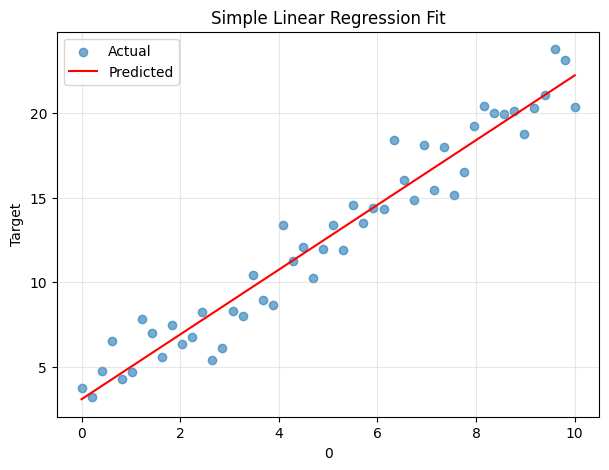


RMSE: 1.3626 | R²: 0.9447


In [3]:
# linear_regression_basic.py
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


def fit_linear_regression(X, y, add_constant=True, plot=True):
    """
    Fit a simple or multiple linear regression model using statsmodels OLS.

    Parameters
    ----------
    X : array-like or DataFrame
        Independent variable(s)
    y : array-like or Series
        Dependent variable
    add_constant : bool, default=True
        Adds an intercept to the model
    plot : bool, default=True
        If True, shows scatter + regression line for single-variable case

    Returns
    -------
    model : statsmodels RegressionResultsWrapper
        The fitted regression model
    """
    # Convert to DataFrame/Series
    X = pd.DataFrame(X)
    y = pd.Series(y)

    if add_constant:
        X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print("\n=== Linear Regression Summary ===")
    print(model.summary())

    # Plot only if 1D regression
    if plot and X.shape[1] == 2:  # constant + 1 feature
        plt.figure(figsize=(7, 5))
        plt.scatter(X.iloc[:, 1], y, alpha=0.6, label="Actual")
        plt.plot(X.iloc[:, 1], model.predict(X), color="red", label="Predicted")
        plt.title("Simple Linear Regression Fit")
        plt.xlabel(X.columns[1])
        plt.ylabel("Target")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

    # Evaluation metrics
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    print(f"\nRMSE: {rmse:.4f} | R²: {r2:.4f}")

    return model

# Example: Simple linear relationship
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 + 2*x + np.random.normal(0, 1.5, 50)

# Fit and visualize
model = fit_linear_regression(x, y)
